In [ ]:
# STP 550 : STATISTICAL MACHINE LEARNING
#Assignment 3

#Rakshit Govind Thota (ASU ID:1233527830)
#Latika Liladhar Dekate (ASU ID: 1233661652)

In [ ]:
# Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("susedcars.csv")
df.columns = df.columns.str.strip()

# Scale features
df['price'] /= 1000
df['mileage'] /= 1000

# Feature and target split
X = df[['mileage', 'year']]
y = df['price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)


In [ ]:
# Decision Tree

Matplotlib is building the font cache; this may take a moment.


Decision Tree (20 leaf nodes) RMSE: 6.1320762555053845


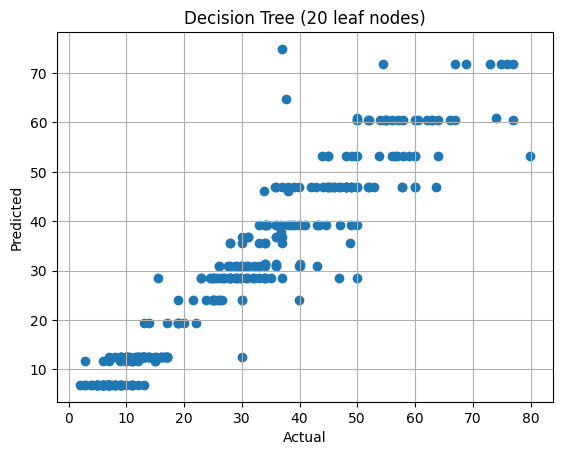

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

tree20 = DecisionTreeRegressor(max_leaf_nodes=20, random_state=0)
tree20.fit(X_train, y_train)
preds = tree20.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Decision Tree (20 leaf nodes) RMSE:", rmse)
plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree (20 leaf nodes)")
plt.grid(True)
plt.show()


Decision Tree (10 leaf nodes) RMSE: 5.687233054975746


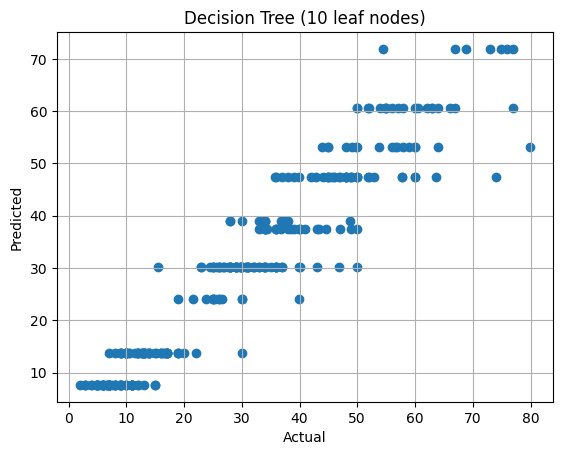

In [ ]:
tree10 = DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)
tree10.fit(X_train, y_train)
preds = tree10.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Decision Tree (10 leaf nodes) RMSE:", rmse)
plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree (10 leaf nodes)")
plt.grid(True)
plt.show()


Pruned Tree RMSE (ccp_alpha=1.04723): 5.643184274686354


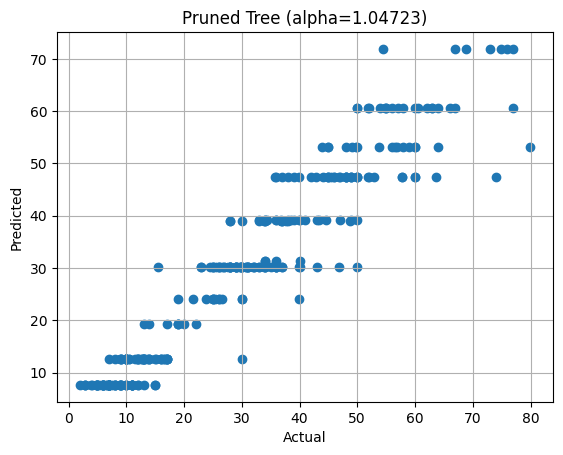

In [ ]:
full_tree = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
scores = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append((ccp_alpha, score))

best_alpha = sorted(scores, key=lambda x: x[1], reverse=True)[0][0]
pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)
preds = pruned_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"Pruned Tree RMSE (ccp_alpha={best_alpha:.5f}):", rmse)
plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Pruned Tree (alpha={best_alpha:.5f})")
plt.grid(True)
plt.show()


In [ ]:
# Random Forest

Random Forest RMSE: 5.643544769830574


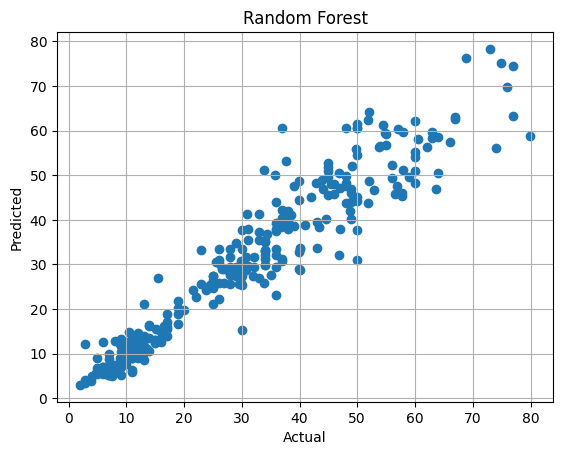

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Random Forest RMSE:", rmse)
plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest")
plt.grid(True)
plt.show()


In [ ]:
# Gradient Boosting

Gradient Boosting RMSE: 5.170052499218797


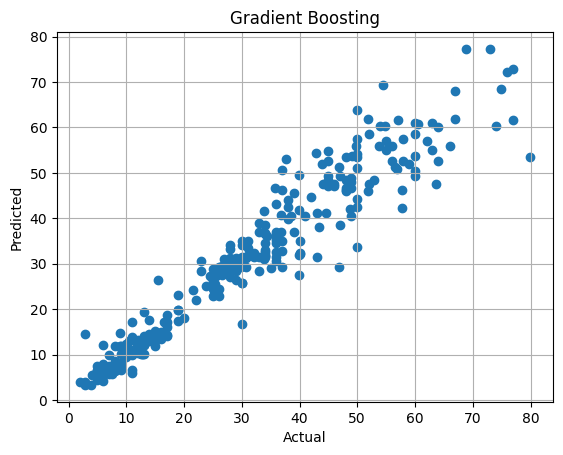

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
boost.fit(X_train, y_train)
preds = boost.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Gradient Boosting RMSE:", rmse)
plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting")
plt.grid(True)
plt.show()


In [ ]:
# Neural Network

Neural Network RMSE: 9.720493626890905


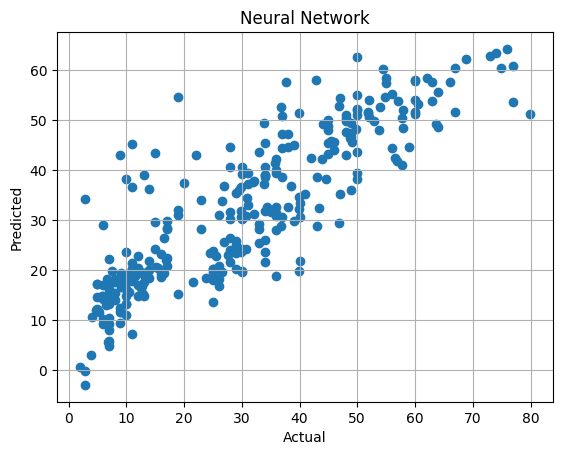

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
nn.fit(X_train, y_train)
preds = nn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Neural Network RMSE:", rmse)
plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network")
plt.grid(True)
plt.show()


In [ ]:
# Compare

In [ ]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return {'Model': name, 'RMSE': rmse, 'Predictions': preds}

results = []

# Decision Tree (20 leaf)
results.append(evaluate_model(DecisionTreeRegressor(max_leaf_nodes=20, random_state=0), "Decision Tree (20)"))

# Decision Tree (10 leaf)
results.append(evaluate_model(DecisionTreeRegressor(max_leaf_nodes=10, random_state=0), "Decision Tree (10)"))

# Pruned Tree
path = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
scores = [(alpha, DecisionTreeRegressor(ccp_alpha=alpha, random_state=0).fit(X_train, y_train).score(X_test, y_test)) for alpha in ccp_alphas]
best_alpha = sorted(scores, key=lambda x: x[1], reverse=True)[0][0]
results.append(evaluate_model(DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=0), f"Pruned Tree (α={best_alpha:.5f})"))

# Random Forest
results.append(evaluate_model(RandomForestRegressor(n_estimators=100, random_state=0), "Random Forest"))

# Gradient Boosting
results.append(evaluate_model(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0), "Gradient Boosting"))

# Neural Network
results.append(evaluate_model(MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=0), "Neural Network"))

# Create and display RMSE table
rmse_df = pd.DataFrame(results)[['Model', 'RMSE']].sort_values(by='RMSE')
print("\nModel Comparison (RMSE):")
print(rmse_df.to_string(index=False))



Model Comparison (RMSE):
                  Model     RMSE
      Gradient Boosting 5.170052
Pruned Tree (α=1.04723) 5.643184
          Random Forest 5.643545
     Decision Tree (10) 5.687233
     Decision Tree (20) 6.132076
         Neural Network 9.720494
